# Project 3: Web APIs and NLP 

### Contents:
- [Data Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)


### Data

**Data from webscraping:** 
* coffeesearch.csv: this dataset contains all of the coffee data from webscraping
* teasearch.csv: this dataset contains all of the tea data from webscraping

*Libraries added here*

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

In [2]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Import 

In [3]:
coffee = pd.read_csv('../datasets/coffeesearch.csv')

In [4]:
tea = pd.read_csv('../datasets/teasearch.csv')

In [5]:
# brief look at coffee
coffee.head(10)

,Unnamed: 0,subreddit,selftext,title,text
0,0,Coffee,"Hello everyone,\n\nA couple of years I bought ...",Tetsu Kasuya signature V60,"Hello everyone,\n\nA couple of years I bought ..."
1,3,Coffee,\n\nWelcome to the daily [/r/Coffee](https://...,[MOD] The Daily Question Thread,\n\nWelcome to the daily [/r/Coffee](https://...
2,4,Coffee,I very recently moved into a new country and h...,Are my local roasteries ripping me off?,I very recently moved into a new country and h...
3,5,Coffee,Hey! im visiting some friends in London and wa...,Where to get a good Geisha coffee in london?,Hey! im visiting some friends in London and wa...
4,6,Coffee,"Get a fine italian expresso, melt a little squ...",Just for real cofee lovers!,"Get a fine italian expresso, melt a little squ..."
5,7,Coffee,I stopped drinking coffee a few years ago and ...,I want to start drinking coffee again.,I stopped drinking coffee a few years ago and ...
6,8,Coffee,Hi all (I hope this is the right place for thi...,Washable Coffee Grinders Similar to Bodum?,Hi all (I hope this is the right place for thi...
7,11,Coffee,I know the title is a horrible combo for coffe...,Favorite decaf whole beans for drip coffee?,I know the title is a horrible combo for coffe...
8,13,Coffee,Looking to expand my horizons.,What coffee grinders do you guys use?,Looking to expand my horizons.What coffee grin...
9,15,Coffee,"I'm willing to spend up to $200, but which cof...",which coffee maker makes the best tasting coffee?,"I'm willing to spend up to $200, but which cof..."


In [6]:
# brief look at size of coffee
coffee.shape

(1219, 5)

In [7]:
# brief look at tea
tea.head(10)

,Unnamed: 0,subreddit,selftext,title,text
0,0,tea,What are you drinking today? What questions h...,"What's in your cup? Daily discussion, question...",What are you drinking today? What questions h...
1,2,tea,I moved into a flat where the electric kettle ...,Electric kettle with temperature control and a...,I moved into a flat where the electric kettle ...
2,9,tea,"Hey guys I have a question, I enjoy Gong fu br...",Gong fu Tisanes?,"Hey guys I have a question, I enjoy Gong fu br..."
3,11,tea,\n\n[View Poll](https://www.reddit.com/poll/pu...,What do you guys like more?,\n\n[View Poll](https://www.reddit.com/poll/pu...
4,17,tea,"Hello, I've recently been wanting to learn abo...",Newbie here: how to start in the fantabulous w...,"Hello, I've recently been wanting to learn abo..."
5,18,tea,I am trying to make pumpkin chai with no milk/...,Pumpkin spice chai,I am trying to make pumpkin chai with no milk/...
6,19,tea,Trying to quit drinking energy drinks for work...,High caffeine teas?,Trying to quit drinking energy drinks for work...
7,20,tea,I enjoy gunpowder tea with some macaroons.,What's y'all's favorite tea and snack combo?,I enjoy gunpowder tea with some macaroons.What...
8,21,tea,I got hooked on the Starbucks iced green tea b...,Loose leaf Dupe for Starbucks Green tea (teava...,I got hooked on the Starbucks iced green tea b...
9,23,tea,I have some other teapots but I find that my K...,Anyone else use a Kyusu for western brewing?,I have some other teapots but I find that my K...


In [8]:
# brief look at size of tea
tea.shape

(1106, 5)

In [9]:
drinks = pd.concat([coffee,tea],axis=0,ignore_index=True)

In [10]:
drinks = drinks[['subreddit','text']]

In [11]:
drinks.tail(10)

,subreddit,text
2315,tea,Rose tea makes my skin look more beautiful tha...
2316,tea,"Hello everyone, Im Gabriel and I made some Non..."
2317,tea,Hey everyone! Not sure if this is the right pl...
2318,tea,I’m typically a green tea girl and never liked...
2319,tea,Here's a neat article about going to China to ...
2320,tea,I'm thinking of getting one that is colored wh...
2321,tea,&amp;#x200B;\n\n[Two guys whom love tea.](http...
2322,tea,I just moved to an area with very hard water. ...
2323,tea,"The bits in question, they don't feel like mou..."
2324,tea,I didn’t notice it til I was halfway thru my s...


## Data Cleaning 

### Removing url, special characters & tokenizing

We need to remove unnecessary characters when cleaning text data (punctuation, symbols, etc.).

When we "**tokenize**" data using RegEx, we take it and split it up into distinct chunks based on some pattern.


**Remove url**

In [12]:
# text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
drinks['text'] = drinks['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '')

<ipython-input-12-041e20e1aa74>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  drinks['text'] = drinks['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '')


**Tokenize**

In [13]:
# Instantiate RegExp Tokenizer
# only kept 2 characters together starting with a character and matches another word character
tokenizer = RegexpTokenizer(r'[a-z]+') 
# (r'\w+') 

In [14]:
# "Run" Tokenizer
drinks['sent_tokens'] = drinks.apply(lambda row: tokenizer.tokenize(row['text'].lower()),axis=1)

In [15]:
drinks['sent_tokens']

0       [hello, everyone, a, couple, of, years, i, bou...
1       [welcome, to, the, daily, r, coffee, question,...
2       [i, very, recently, moved, into, a, new, count...
3       [hey, im, visiting, some, friends, in, london,...
4       [get, a, fine, italian, expresso, melt, a, lit...
                              ...                        
2320    [i, m, thinking, of, getting, one, that, is, c...
2321    [amp, x, b, two, guys, whom, love, tea, all, a...
2322    [i, just, moved, to, an, area, with, very, har...
2323    [the, bits, in, question, they, don, t, feel, ...
2324    [i, didn, t, notice, it, til, i, was, halfway,...
Name: sent_tokens, Length: 2325, dtype: object

In [16]:
drinks.head(10)

,subreddit,text,sent_tokens
0,Coffee,"Hello everyone,\n\nA couple of years I bought ...","[hello, everyone, a, couple, of, years, i, bou..."
1,Coffee,\n\nWelcome to the daily [/r/Coffee]( questio...,"[welcome, to, the, daily, r, coffee, question,..."
2,Coffee,I very recently moved into a new country and h...,"[i, very, recently, moved, into, a, new, count..."
3,Coffee,Hey! im visiting some friends in London and wa...,"[hey, im, visiting, some, friends, in, london,..."
4,Coffee,"Get a fine italian expresso, melt a little squ...","[get, a, fine, italian, expresso, melt, a, lit..."
5,Coffee,I stopped drinking coffee a few years ago and ...,"[i, stopped, drinking, coffee, a, few, years, ..."
6,Coffee,Hi all (I hope this is the right place for thi...,"[hi, all, i, hope, this, is, the, right, place..."
7,Coffee,I know the title is a horrible combo for coffe...,"[i, know, the, title, is, a, horrible, combo, ..."
8,Coffee,Looking to expand my horizons.What coffee grin...,"[looking, to, expand, my, horizons, what, coff..."
9,Coffee,"I'm willing to spend up to $200, but which cof...","[i, m, willing, to, spend, up, to, but, which,..."


### Stop Word Removal
Stop words are common words, such as a and the, are removed to increase the performance of the classifier model. Since stop words occur in abundance, they provide little to no unique information that can be used for classification or clustering.


In [17]:
# Remove general stopwords in the english language 
# Remove additional 'coffee', 'tea' 
# Noted a lot of espresso and expresso words in coffee posts, which is synonymous with coffee
# Noted a few chai, which is the word for tea in many languages, and synonymous with tea (in English)
add_stop = ['coffee', 'coffees', 'tea', 'teas', 'espresso', 'expresso', 'chai']
stoplist = stopwords.words('english') + add_stop

drinks['cleaned_tokens'] = drinks['sent_tokens'].apply(lambda row: [word for word in row if word not in stoplist])

In [18]:
drinks['cleaned_tokens'].head()

0    [hello, everyone, couple, years, bought, v, st...
1    [welcome, daily, r, question, thread, stupid, ...
2    [recently, moved, new, country, exploring, sce...
3    [hey, im, visiting, friends, london, want, fin...
4    [get, fine, italian, melt, little, square, dar...
Name: cleaned_tokens, dtype: object

## Exploratory Data Analysis (EDA) on Posts

### Posts length

In [19]:
# Calculate length of original posts
drinks['posts_length'] = drinks['text'].str.len()

In [20]:
# Calculate word count
drinks['posts_word_count'] = drinks['text'].str.count(' ') + 1

In [21]:
# Show the five longest and five shortest original posts
drinks.sort_values(by=['posts_word_count'], ascending=False)[['subreddit','text','posts_word_count']].head(10)

,subreddit,text,posts_word_count
77,Coffee,#**Preface**\nI originally started writing thi...,1761
844,Coffee,Skip to the end for TLDR\n\nI was recently in ...,874
651,Coffee,"I received my K2 less than a week ago, didn’t ...",828
1568,tea,"I know people love to be positive, so I just w...",819
1218,Coffee,Hi all! My last nanopresso post got taken down...,817
340,Coffee,"I am feeling the itch, boredom, or just tired...",785
156,Coffee,(Warning: this will be a fairly long post; I h...,761
1935,tea,It doesn’t feel like it’s been five days since...,755
1012,Coffee,"Thumbs down for me. \n\n\nFirst, I did not fi...",697
1328,tea,\nOk so after making my own tea pets I wanted ...,636


In [22]:
drinks.sort_values(by=['posts_word_count'],ascending=True)[['subreddit','text','posts_word_count']].head(10)

,subreddit,text,posts_word_count
2114,tea,&amp;#x200B;\n\n[black tea]( black tea,4
2038,tea,Best tea\n\n[View Poll]( tea?,4
1082,Coffee,Has anyone purchased from them?Lightroaster.com,5
562,Coffee,Yay or nay?Salt in coffee?,5
1698,tea,\n\n[View Poll]( do you prefer?,5
1348,tea,\n\n[View Poll]( or black tea,5
1869,tea,\n\n[View Poll]( on Arizona bottled/canned tea?,6
1721,tea,\n\n[View Poll]( tea with milk good,6
1323,tea,Tea with milk or without\n\n[View Poll]( debate,7
1222,tea,\n\n[View Poll]( do you guys like more?,7


In [23]:
# Compare length by subreddits
drinks.groupby(['subreddit'])[['posts_length','posts_word_count']].mean()

,posts_length,posts_word_count
subreddit,,
Coffee,584.338802,105.570960
tea,483.822785,88.951175


**From the tables above, the longer posts are from coffee, while tea posts are relatively shorter.**

### Distribution of posts

In [24]:
drinks['posts_word_count'].describe()

count    2325.000000
mean       97.664946
std        90.231773
min         4.000000
25%        47.000000
50%        78.000000
75%       116.000000
max      1761.000000
Name: posts_word_count, dtype: float64

From the above plots/table, most of the posts are in the lower magnitudes with the median at 78 word count. However, there were also really long posts, with a maximum at 1761 word count. 

C:\Users\USER\anaconda3\envs\dsi24\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\envs\dsi24\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


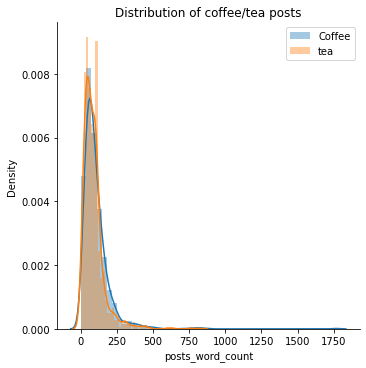

In [25]:
plot = sns.FacetGrid(drinks, hue='subreddit', height=5)
plot = plot.map(sns.distplot, 'posts_word_count')
plt.title('Distribution of coffee/tea posts')
plt.ylabel('Density')
plt.legend();

From the above plot, distribution of posts in both coffee and tea are similar. 

## EDA on Tokenized Words

### Lemmatizing & Stemming

**Lemmatizing** and **stemming** are two forms of shortening words so we can combine similar forms of the same word.

#### Using ntlk('wordnet') for lemmatizing

In [26]:
# Instantiate lemmatizer. 
# download dictionary wordnet
lemmatizer = WordNetLemmatizer()

In [27]:
# Lemmatize tokens.
def lemmatize_text(row):
    return [lemmatizer.lemmatize(w) for w in row] 

drinks['wordnet_lem'] = drinks['cleaned_tokens'].apply(lemmatize_text)


In [28]:
drinks['wordnet_lem']

0       [hello, everyone, couple, year, bought, v, sta...
1       [welcome, daily, r, question, thread, stupid, ...
2       [recently, moved, new, country, exploring, sce...
3       [hey, im, visiting, friend, london, want, find...
4       [get, fine, italian, melt, little, square, dar...
                              ...                        
2320    [thinking, getting, one, colored, white, insid...
2321                          [amp, x, b, two, guy, love]
2322    [moved, area, hard, water, strong, black, made...
2323    [bit, question, feel, like, mould, stay, toget...
2324    [notice, til, halfway, thru, second, cup, noti...
Name: wordnet_lem, Length: 2325, dtype: object

**Explore lemmatizing**

In [29]:
# Example of lemmatized words in one row of drinks
for num in range(len(drinks['cleaned_tokens'][0])):
    if drinks['cleaned_tokens'][0][num] != drinks['wordnet_lem'][0][num]:
        print(drinks['cleaned_tokens'][0][num],drinks['wordnet_lem'][0][num])


years year
recipes recipe
results result
shops shop
machines machine
recipes recipe
recipes recipe


#### Using porter stemming

In [30]:
pd.options.display.max_colwidth = 200
drinks.head()

,subreddit,text,sent_tokens,cleaned_tokens,posts_length,posts_word_count,wordnet_lem
0,Coffee,"Hello everyone,\n\nA couple of years I bought a V60, and started experimenting with it, mostly following online recipes. \n\nI’ve had limited success with it, comparing my results to coffee shops,...","[hello, everyone, a, couple, of, years, i, bought, a, v, and, started, experimenting, with, it, mostly, following, online, recipes, i, ve, had, limited, success, with, it, comparing, my, results, ...","[hello, everyone, couple, years, bought, v, started, experimenting, mostly, following, online, recipes, limited, success, comparing, results, shops, however, still, better, cheap, drip, machines, ...",727,124,"[hello, everyone, couple, year, bought, v, started, experimenting, mostly, following, online, recipe, limited, success, comparing, result, shop, however, still, better, cheap, drip, machine, main,..."
1,Coffee,"\n\nWelcome to the daily [/r/Coffee]( question thread!\n\nThere are no stupid questions here, ask a question and get an answer! We all have to start somewhere and sometimes it is hard to figure o...","[welcome, to, the, daily, r, coffee, question, thread, there, are, no, stupid, questions, here, ask, a, question, and, get, an, answer, we, all, have, to, start, somewhere, and, sometimes, it, is,...","[welcome, daily, r, question, thread, stupid, questions, ask, question, get, answer, start, somewhere, sometimes, hard, figure, right, wrong, luckily, r, community, loves, help, question, use, spe...",890,153,"[welcome, daily, r, question, thread, stupid, question, ask, question, get, answer, start, somewhere, sometimes, hard, figure, right, wrong, luckily, r, community, love, help, question, use, speci..."
2,Coffee,"I very recently moved into a new country and have been exploring the coffee scene around. I bought a few bags of beans from a place and tested them in a few methods, made a few chemex, v60 and esp...","[i, very, recently, moved, into, a, new, country, and, have, been, exploring, the, coffee, scene, around, i, bought, a, few, bags, of, beans, from, a, place, and, tested, them, in, a, few, methods...","[recently, moved, new, country, exploring, scene, around, bought, bags, beans, place, tested, methods, made, chemex, v, espressos, really, gassy, little, crema, blooming, pour, overs, non, existen...",720,136,"[recently, moved, new, country, exploring, scene, around, bought, bag, bean, place, tested, method, made, chemex, v, espresso, really, gassy, little, crema, blooming, pour, over, non, existent, ro..."
3,Coffee,Hey! im visiting some friends in London and want to find a shop that serves a premium Geisha. Any help would be great!Where to get a good Geisha coffee in london?,"[hey, im, visiting, some, friends, in, london, and, want, to, find, a, shop, that, serves, a, premium, geisha, any, help, would, be, great, where, to, get, a, good, geisha, coffee, in, london]","[hey, im, visiting, friends, london, want, find, shop, serves, premium, geisha, help, would, great, get, good, geisha, london]",162,31,"[hey, im, visiting, friend, london, want, find, shop, serf, premium, geisha, help, would, great, get, good, geisha, london]"
4,Coffee,"Get a fine italian expresso, melt a little square of dark chocolate in it (at least 70% cocoa) and a dash of cinemon. Nothing more!\n\nAnd then, Like Homer said, ""It's like a party in my mouth and...","[get, a, fine, italian, expresso, melt, a, little, square, of, dark, chocolate, in, it, at, least, cocoa, and, a, dash, of, cinemon, nothing, more, and, then, like, homer, said, it, s, like, a, pa...","[get, fine, italian, melt, little, square, dark, chocolate, least, cocoa, dash, cinemon, nothing, like, homer, said, like, party, mouth, everyone, invited, real, cofee, lovers]",242,43,"[get, fine, italian, melt, little, square, dark, chocolate, least, cocoa, dash, cinemon, nothing, like, homer, said, like, party, mouth, everyone, invited, real, cofee, lover]"


In [31]:
# Instantiate PorterStemmer.
p_stemmer = PorterStemmer()

In [32]:
# Stem tokens.
def stem_text(row):
    return [p_stemmer.stem(w) for w in row] 

drinks['sent_pstem'] = drinks['cleaned_tokens'].apply(stem_text)

In [33]:
drinks['sent_pstem']

0       [hello, everyon, coupl, year, bought, v, start, experi, mostli, follow, onlin, recip, limit, success, compar, result, shop, howev, still, better, cheap, drip, machin, main, issu, brew, time, whate...
1       [welcom, daili, r, question, thread, stupid, question, ask, question, get, answer, start, somewher, sometim, hard, figur, right, wrong, luckili, r, commun, love, help, question, use, specif, piec,...
2       [recent, move, new, countri, explor, scene, around, bought, bag, bean, place, test, method, made, chemex, v, espresso, realli, gassi, littl, crema, bloom, pour, over, non, exist, roasteri, put, ro...
3                                                                                      [hey, im, visit, friend, london, want, find, shop, serv, premium, geisha, help, would, great, get, good, geisha, london]
4                                           [get, fine, italian, melt, littl, squar, dark, chocol, least, cocoa, dash, cinemon, noth, like, homer, said, like, parti, mo

**Explore stemming**

In [34]:
# Example of stemmed words in one row of drinks
for num in range(len(drinks['cleaned_tokens'][0])):
    if drinks['cleaned_tokens'][0][num] != drinks['sent_pstem'][0][num]:
        print(drinks['cleaned_tokens'][0][num],drinks['sent_pstem'][0][num])

everyone everyon
couple coupl
years year
started start
experimenting experi
mostly mostli
following follow
online onlin
recipes recip
limited limit
comparing compar
results result
shops shop
however howev
machines machin
issue issu
whatever whatev
always alway
recipes recip
realized realiz
edition edit
apparently appar
anyone anyon
experience experi
specific specif
edition edit
maybe mayb
advise advis
adapting adapt
recipes recip
anything anyth
else els
worry worri
thanks thank
signature signatur


In [35]:
# differences in lemmatizing and stemming
print(lemmatizer.lemmatize("grinding"))
print(p_stemmer.stem("grinding"))

grinding
grind


From the above comparison, porter stemming is stricter than lemmatizing. For example, 'thanks' was stemmed to 'thank', but 'thanks' was not lemmatized. 'grinding' was stemmed but kept as the original during lemmatizing. Porter stemming might help to consolidate the data better for the classifier model, but this is uncertain for now. So, both columns 'wordnet_lem' and 'sent_pstem' are kept (for the models later).


### Explore n-gram range

In [36]:
# this must be in Series
# analysis of cleaned data, not original text
data_cleaned = drinks['cleaned_tokens'].apply(lambda row: ' '.join(row))

In [37]:
# stop words in list
stoplist = stopwords.words('english') + add_stop

# instantiate
cvec = CountVectorizer(stop_words = stoplist, ngram_range=(2,3))

# matrix of ngrams
ngrams = cvec.fit_transform(data_cleaned)

# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = cvec.vocabulary_

df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [38]:
df_ngram.head(20)

,frequency,bigram/trigram
0,190,french press
1,142,loose leaf
2,135,cold brew
3,128,moka pot
4,111,feel free
5,105,anything else
6,95,would like
7,86,questions ask
8,86,one make
9,86,make fun


In [39]:
df_ngram.tail(20)

,frequency,bigram/trigram
180213,1,able achieve
180214,1,ability truly judge
180215,1,ability truly
180216,1,ability set temperature
180217,1,ability set bloom
180218,1,ability make milk
180219,1,ability make
180220,1,ability keep temperature
180221,1,ability keep
180222,1,ability ddarjeeling


From the above, it seems that the most common n-grams are bigrams. 'french press', 'cold brew' are not surprising bigrams since there are associated with coffee. 'loose leaf' is associated with tea. Also, most common trigrams are 'worry one make', 'well even talk', 'want advice guy', which most probably mean that a trigram search is not necessary or helpful? In addition, least frequent n-grams are trigrams associated with abdominal pain or ability to brew coffee/tea. 
<br> **From this analysis, trigrams might not be useful.** 

### Most common words

In [40]:
# instantiate
# finding unigrams 
# analysis on cleaned sentences, not original text
cvec_1 = CountVectorizer(stop_words = stoplist)

# matrix of ngrams
unigrams = cvec_1.fit_transform(data_cleaned)


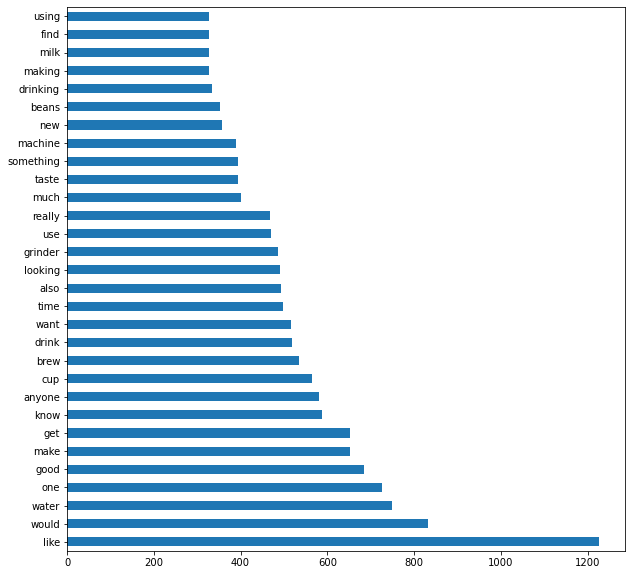

In [41]:
df_unigrams = pd.DataFrame(unigrams.todense(), columns=cvec_1.get_feature_names())

# plot top occuring words
df_unigrams.sum().sort_values(ascending=False).head(30).plot(kind='barh',figsize=(10,10));

In [42]:
# 30 most common words (in general)
df_unigrams.sum().sort_values(ascending=False).head(30)

like         1225
would         832
water         749
one           726
good          685
make          653
get           653
know          587
anyone        580
cup           564
brew          534
drink         518
want          516
time          497
also          492
looking       491
grinder       486
use           469
really        467
much          402
taste         394
something     393
machine       390
new           358
beans         352
drinking      335
making        327
milk          326
find          326
using         326
dtype: int64

The above list are the most common words found in the posts, associated with both coffee and tea. From the above plot, a number of the common words can occur > 400 times in the dataset. 

#### Most common words based on subreddit

In [43]:
vector_text = pd.concat([drinks['subreddit'], df_unigrams.drop(columns=['subreddit'])], axis=1)

pd.options.display.max_colwidth = 50
vector_text.head()

,subreddit,aa,abate,abdominal,ability,able,abnormally,aboard,abou,aboutcop,...,zojurushi,zone,zoned,zones,zoom,zpresso,zsxz,zu,zzxz,zzzz
0,Coffee,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Coffee,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Coffee,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Coffee,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Coffee,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Top 30 words for 'coffee'
coffee_words = vector_text[vector_text['subreddit'] == 'Coffee'].drop(columns=['subreddit']).sum().sort_values(ascending=False).head(30)

In [45]:
coffee_words.index

Index(['like', 'would', 'grinder', 'water', 'get', 'one', 'good', 'machine',
       'brew', 'beans', 'make', 'cup', 'use', 'time', 'anyone', 'know',
       'looking', 'grind', 'pour', 'much', 'using', 'new', 'want', 'something',
       'also', 'really', 'taste', 'press', 'pot', 'drink'],
      dtype='object')

<img src="../images/coffee-cup.jpg" style="height:300px"> 

In [46]:
# Top 30 words for 'tea'
tea_words = vector_text[vector_text['subreddit'] == 'tea'].drop(columns=['subreddit']).sum().sort_values(ascending=False).head(30)

In [47]:
tea_words.index

Index(['like', 'one', 'make', 'would', 'drink', 'green', 'good', 'know',
       'want', 'water', 'anyone', 'questions', 'also', 'talk', 'really', 'get',
       'drinking', 'oolong', 'black', 'cup', 'looking', 'leaf', 'mind', 'even',
       'making', 'time', 'anything', 'love', 'brew', 'taste'],
      dtype='object')

<img src="../images/tea-pot.jpg" style="height:300px"> 

In [48]:
# common words
common_words = [word for word in coffee_words.index if word in tea_words.index]

In [49]:
common_words

['like',
 'would',
 'water',
 'get',
 'one',
 'good',
 'brew',
 'make',
 'cup',
 'time',
 'anyone',
 'know',
 'looking',
 'want',
 'also',
 'really',
 'taste',
 'drink']

The above 'common_words' are the most common words in both subreddits (found separately). They are almost similar to the df_unigrams. However, since 'coffee''s posts are relatively longer, most of the common words found in df_unigrams seemed to be associated with 'coffee', rather than 'tea. 
<br> 
<br> Most of the 'common_words' are associated with what they 'like', 'brew' with 'water', having a 'cup', making a 'drink', the 'taste' of each 'drink', or how they 'drink'. Also, most of the posts will consist of people asking 'anyone', when they are 'looking' for a 'good' place to have a 'cup' of beverage. 


#### Words most likely associated with each subreddit

In [50]:
# Words only associated with 'coffee'
coffee = [word for word in coffee_words.index if word not in tea_words.index]

In [51]:
coffee

['grinder',
 'machine',
 'beans',
 'use',
 'grind',
 'pour',
 'much',
 'using',
 'new',
 'something',
 'press',
 'pot']

From the above list, words like 'grinder', 'grind', 'machine', 'beans', 'press' would most likely be associated with coffee, and not tea. 

In [52]:
# Words only associated with 'tea'
tea = [word for word in tea_words.index if word not in coffee_words.index]

In [53]:
tea

['green',
 'questions',
 'talk',
 'drinking',
 'oolong',
 'black',
 'leaf',
 'mind',
 'even',
 'making',
 'anything',
 'love']

From the above list, words like 'green', 'oolong', 'black, 'leaf' would most likely be associated with tea and not coffee.

# Save data to csv file

In [54]:
drinks['cleaned_sent'] = drinks['cleaned_tokens'].apply(lambda row: ' '.join(row))

In [55]:
drinks['lemmatized_sent'] = drinks['wordnet_lem'].apply(lambda row: ' '.join(row))

In [56]:
drinks['pstemmed_sent'] = drinks['sent_pstem'].apply(lambda row: ' '.join(row))

In [57]:
# save dataframe for csv file
drinks = drinks[['subreddit','cleaned_sent','lemmatized_sent','pstemmed_sent']]

In [58]:
drinks.to_csv('../datasets/drinks.csv')
